# Trabajo No.4
## Exploracion
#### integrantes:Jose Foronda y Alexa Paternina

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
# Cargardo el conjunto de datos
df = pd.read_csv('datosenergeticos.csv', sep=',')
df

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
0,4,93.423205,103853.2206,248708.4892,2953.248771,89.887562,4,4.732248e+08,1,9.207772e+06,6663.816572,81.742461,1366
1,4,590.468942,190223.0649,166104.1642,5305.174042,84.403343,4,1.670697e+08,2,1.685101e+06,30656.049820,78.139042,1743
2,1,625.951142,266023.4824,424114.6308,2620.192622,60.498249,2,8.463610e+07,2,5.111813e+06,1749.613759,8.461296,363
3,1,779.998728,487039.5296,308337.7316,1925.250307,86.897861,3,3.967690e+08,2,4.805902e+06,43233.237820,8.402441,2821
4,3,242.106837,482815.0856,360437.7705,3948.945383,70.949351,2,3.574413e+07,1,1.668601e+07,14858.662760,28.822867,2583
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,3,745.032555,280007.5738,230544.8268,4351.687893,90.791405,4,3.484136e+08,2,1.558508e+07,25234.911810,78.923200,1452
14996,1,15.187023,377340.5803,358547.3589,6792.194696,78.252040,4,2.560179e+08,3,6.866618e+06,15762.519790,54.982974,2598
14997,3,877.539059,480497.3920,214441.6719,4588.725297,58.282928,1,1.300112e+08,2,3.837764e+06,44597.809410,43.915897,2713
14998,7,551.264716,436383.1694,137043.8713,7251.144215,73.573666,2,3.334831e+08,2,5.347706e+06,34363.858000,4.877145,2128


In [18]:
# Realizar análisis exploratorio de datos
# en el tipo de energia esta dado por los siguientes numeros (1: Solar, 2: Viento, 3: Hidroeléctrica, 4: Geothermal, 5: Biomasa, 6: Marea, 7: Ola).
#en el Grid_Integration_Level  (1: Completamente integrado, 2: parcialmente integrado, 3: Integración mínima, 4: Micromald en aislamiento).
#en el Funding_Sources por(1: Gobierno, 2: privado, 3: Asociación público-privada).
df.head(),df.describe()


(   Type_of_Renewable_Energy  Installed_Capacity_MW  Energy_Production_MWh  \
 0                         4              93.423205            103853.2206   
 1                         4             590.468942            190223.0649   
 2                         1             625.951142            266023.4824   
 3                         1             779.998728            487039.5296   
 4                         3             242.106837            482815.0856   
 
    Energy_Consumption_MWh  Energy_Storage_Capacity_MWh  \
 0             248708.4892                  2953.248771   
 1             166104.1642                  5305.174042   
 2             424114.6308                  2620.192622   
 3             308337.7316                  1925.250307   
 4             360437.7705                  3948.945383   
 
    Storage_Efficiency_Percentage  Grid_Integration_Level  \
 0                      89.887562                       4   
 1                      84.403343                   

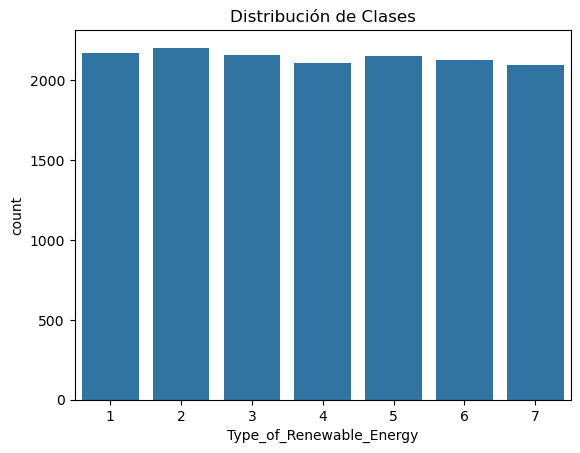

In [19]:
#mostrar la distribucion de la clase
sns.countplot(x='Type_of_Renewable_Energy', data=df)
plt.title('Distribución de Clases')
plt.show()

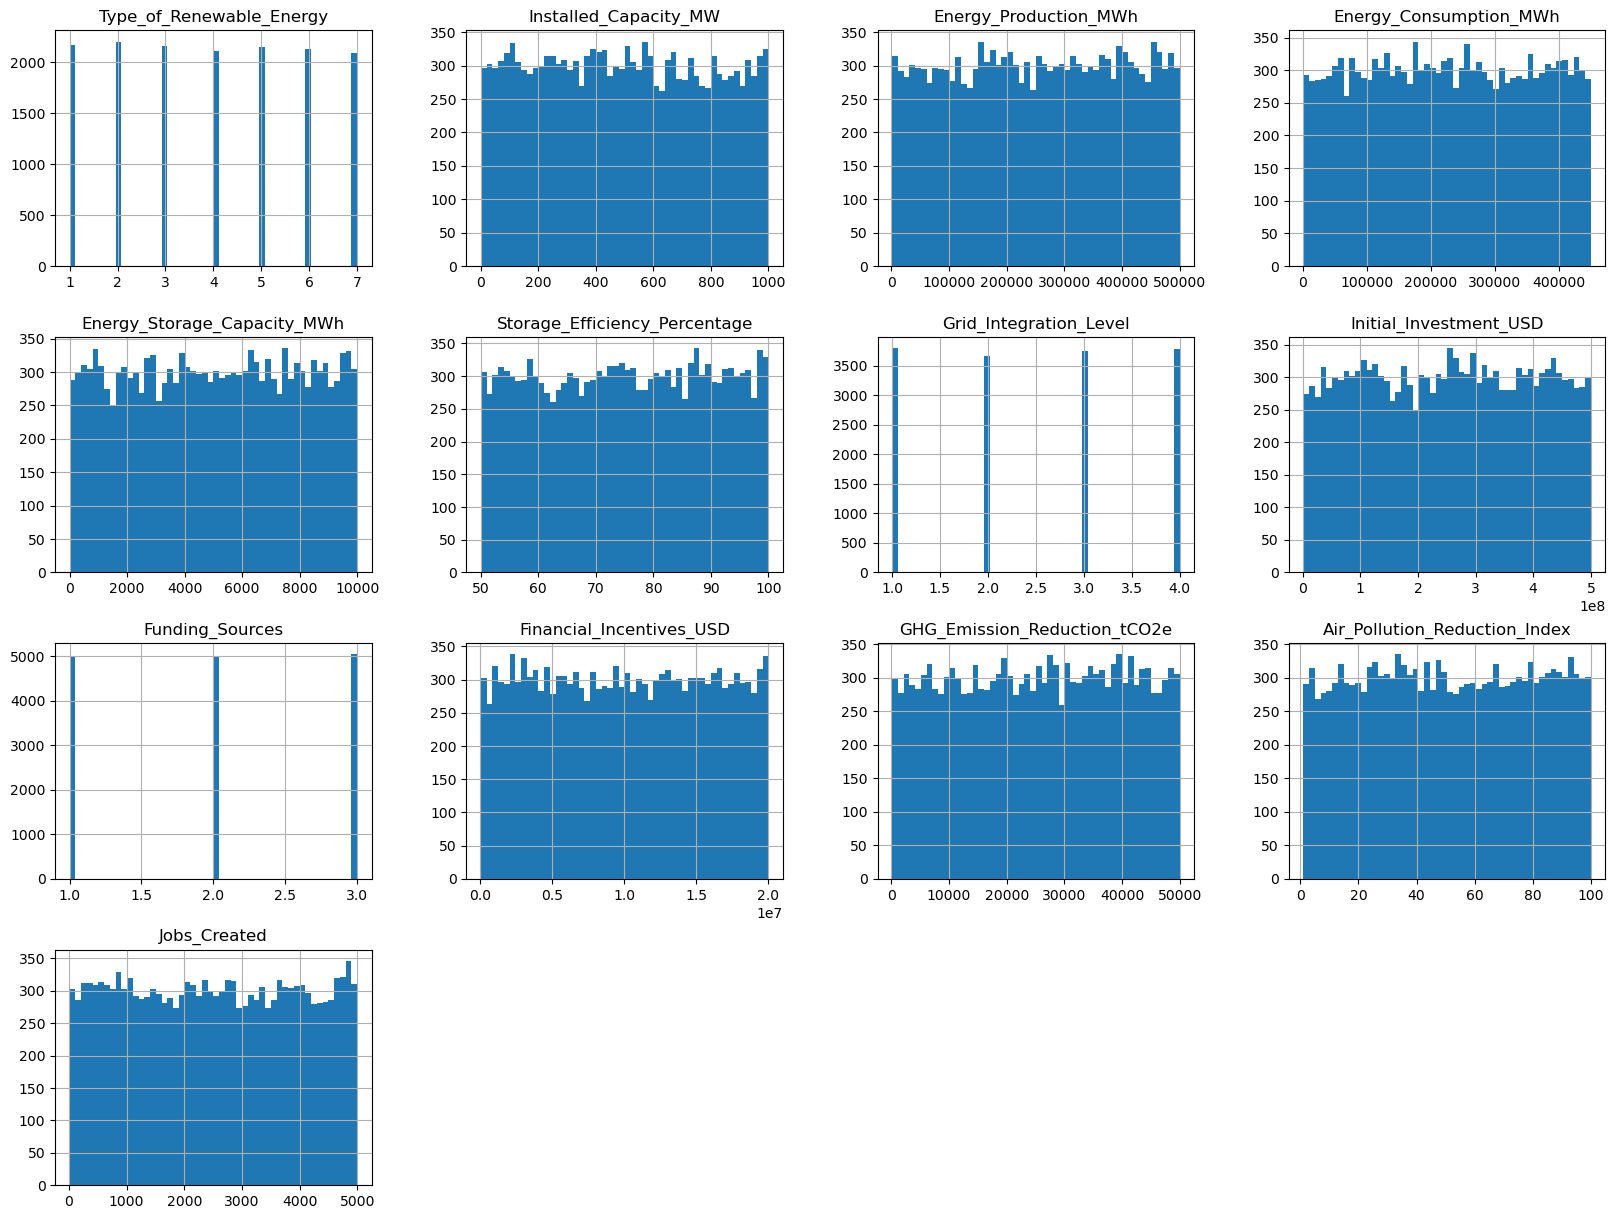

In [20]:
# mostrar la distribución de las variables numéricas
df.hist(bins=50, figsize=(20, 15))
plt.show()

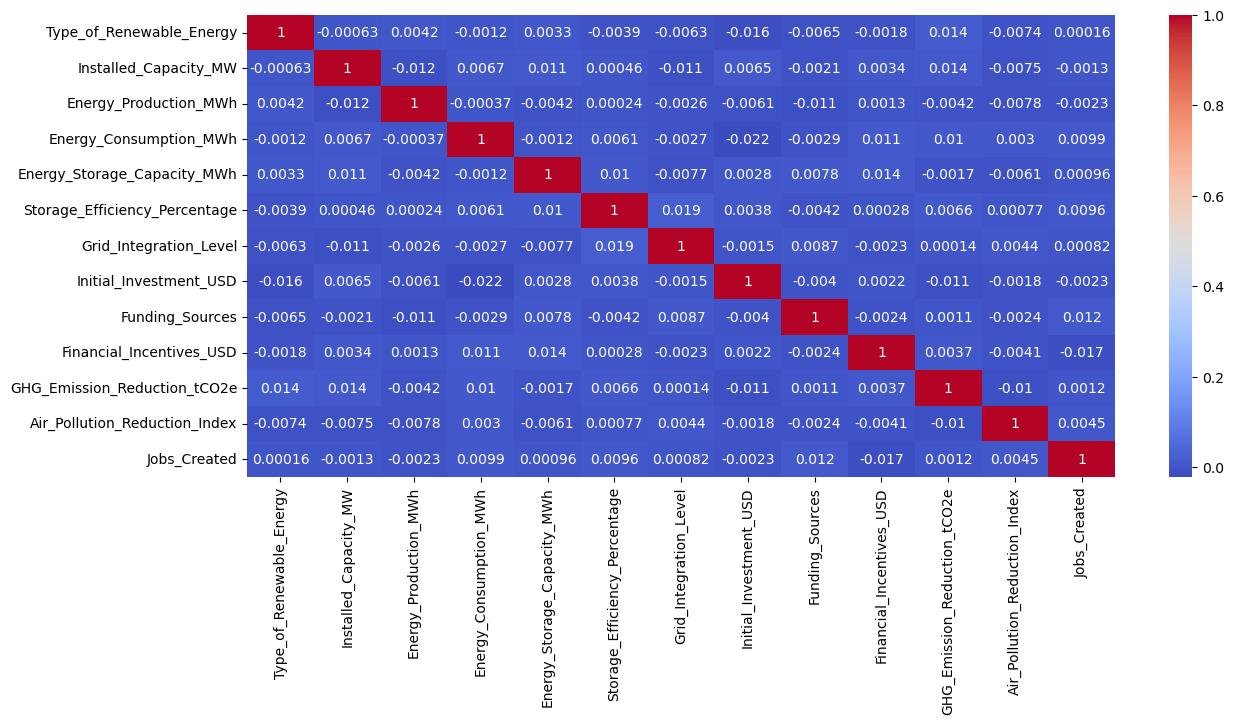

In [24]:
# mostrar la correlación entre las variables
plt.figure(figsize=(14, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
